In [1]:
from selenium import webdriver
from time import sleep
import pandas as pd
from io import StringIO
from functools import partial
import matplotlib.pyplot as plt
from selenium.webdriver.support import expected_conditions as EC
from selenium.common import NoSuchElementException
from matplotlib import style

print(plt.style.available)
%matplotlib inline

driver=webdriver.Edge()

url='https://quote.cngold.org/gjs/swhj_zghj.html'
driver.get(url)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
try:
    next_page=driver.find_element('partial link text','下一页')
    next_page.click()
except NoSuchElementException:
    print("Hello")

In [ ]:
string_list=[]

i=0

while i==0:
    string=driver.find_element('id','goldTable').text
    string_list.append(string)
    #driver.refresh()
    try:
        next_page=driver.find_element('partial link text','下一页')
        next_page.click()
    except NoSuchElementException:
        break
    #sleep(3)

In [ ]:
driver.quit()

In [ ]:
fun_read_csv=partial(pd.read_csv,sep=' ')

In [ ]:
io_list=map(StringIO,string_list)

In [ ]:
df_list=list(map(fun_read_csv,io_list))

In [ ]:
df_gold=pd.concat(df_list)

In [ ]:
df_gold=df_gold.reset_index(drop=True)

In [ ]:
df_gold

In [69]:
df_gold.query("价格>1000")

,名称,价格,单位,纯度,手工费,涨跌,更新日期
916,中国黄金基础金价,2781.0,元/克,99.9%,0,涨,2019-04-25
970,中国黄金基础金价,2860.0,元/克,99.9%,0,平,2019-01-29
971,中国黄金基础金价,2860.0,元/克,99.9%,0,平,2019-01-28
972,中国黄金基础金价,2860.0,元/克,99.9%,0,平,2019-01-25
973,中国黄金基础金价,2860.0,元/克,99.9%,0,平,2019-01-24
974,中国黄金基础金价,2860.0,元/克,99.9%,0,平,2019-01-23
975,中国黄金基础金价,2860.0,元/克,99.9%,0,平,2019-01-22
976,中国黄金基础金价,2860.0,元/克,99.9%,0,平,2019-01-21
977,中国黄金基础金价,2860.0,元/克,99.9%,0,平,2019-01-18
978,中国黄金基础金价,2860.0,元/克,99.9%,0,平,2019-01-17


In [80]:
df_gold['Price']=df_gold['价格']

In [81]:
df_gold['date']=pd.to_datetime(df_gold['更新日期'])

In [82]:
df_gold.loc[df_gold['Price']>1000,'Price']=df_gold['Price']/10

In [83]:
df_gold['Price'].describe()

count    2699.000000
mean      308.881141
std        57.492744
min       218.000000
25%       263.700000
50%       284.200000
75%       366.650000
max       448.000000
Name: Price, dtype: float64

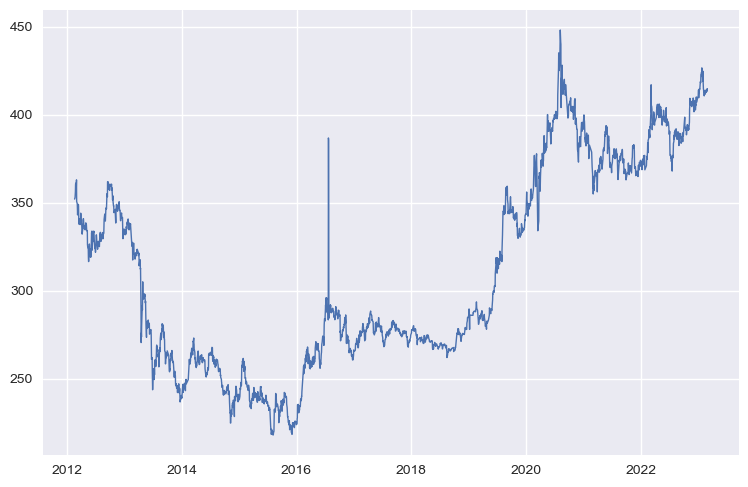

In [91]:
plt.style.use('seaborn')
fig,ax=plt.subplots()
ax.plot(df_gold['date'],df_gold['Price'],lw=1)